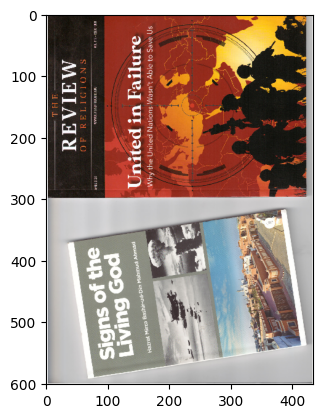

In [60]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

# 1. Read in the scanned image
img = cv2.imread("C:/Users/MebzA/Downloads/test.png", cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



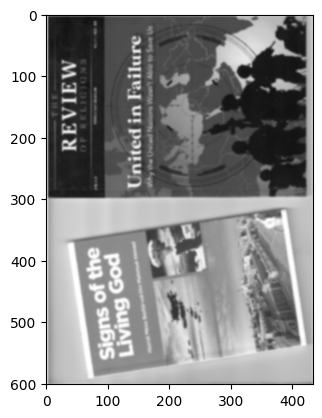

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))

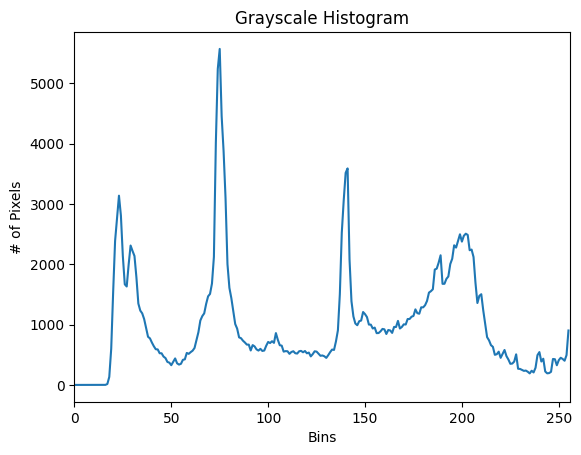

In [12]:
hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])
# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

[INFO] otsu's thresholding value: 155.0


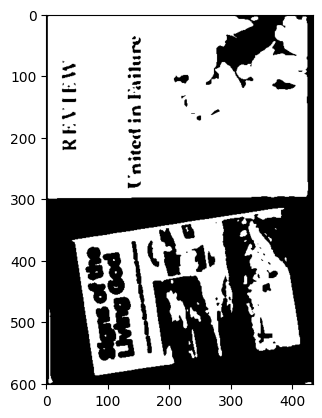

In [16]:
(T, threshInv) = cv2.threshold(blurred, 155, 255,
	cv2.THRESH_BINARY_INV)
plt.imshow(cv2.cvtColor(threshInv, cv2.COLOR_BGR2RGB))
print("[INFO] otsu's thresholding value: {}".format(T))

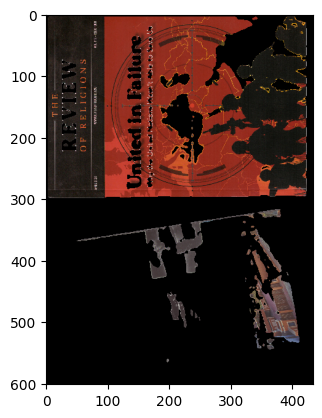

In [4]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(img, img, mask=threshInv)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))

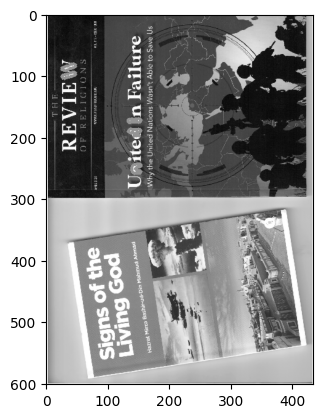

In [ ]:


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


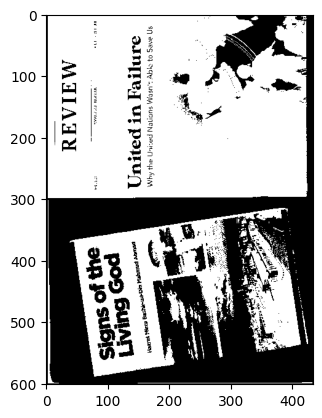

In [79]:
blur_gray= cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV )[1]
plt.imshow(thresh, cmap='gray')


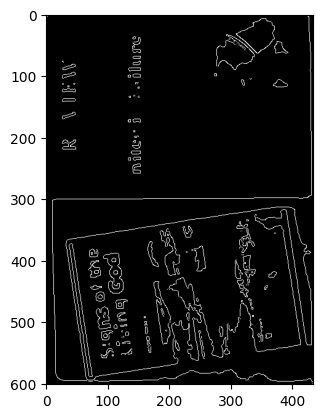

In [27]:
# 2. (Optionally) Denoise/blur + threshold or edge detection
blur = cv2.GaussianBlur(img, (7,7), 1)
edges = cv2.Canny(thresh, 5, 200)

plt.imshow(edges, cmap='gray')

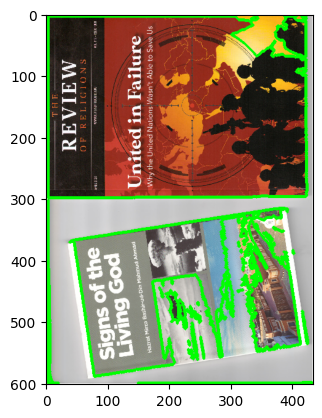

In [80]:

# 3. Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. Filter out contours
min_area = 1 # Example threshold, depends on resolution
candidate_contours = []
for c in contours:
    
    area = cv2.contourArea(c)
    
    if area > min_area:
        candidate_contours.append(c)

# show the contours on the image
img_c = img.copy()
cv2.drawContours(img_c, candidate_contours, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))


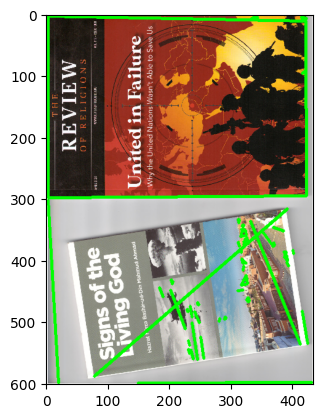

In [81]:

# 5. For each candidate, approximate to see if it’s roughly rectangular
docs = []
for c in candidate_contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.1*perimeter, True)
    # If it has 4 corners, it's likely a rectangle
    docs.append(approx)
    
img_c = img.copy()
cv2.drawContours(img_c, docs, -1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB))

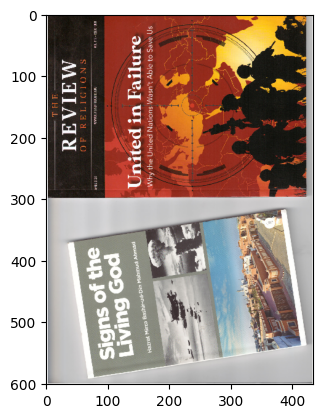

In [65]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:

# 6. Get bounding boxes (either axis-aligned or perspective corrected)
# Axis-aligned bounding box approach:
for doc in docs:
    x, y, w, h = cv2.boundingRect(doc)
    cropped = img[y:y+h, x:x+w]
    # Save or process 'cropped'
    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    
# print the image to jupyter notebook
# cv2.imshow('image', img)

# (Alternatively, for perspective transform, you’d order the four points 
#  of 'doc' and warp them to a rectangle.)